<a href="https://colab.research.google.com/github/JeFFich/Data_analysis/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.cluster.hierarchy as scp
import sklearn.cluster as skl
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
pd.options.display.float_format = '{:,.3f}'.format # Лучше использовать для избавления от научной нотации при выводе

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.310,34.190,15.000,"5,612.000","1,283.000","1,015.000",472.000,1.494,"66,900.000"
1,-114.470,34.400,19.000,"7,650.000","1,901.000","1,129.000",463.000,1.820,"80,100.000"
2,-114.560,33.690,17.000,720.000,174.000,333.000,117.000,1.651,"85,700.000"
3,-114.570,33.640,14.000,"1,501.000",337.000,515.000,226.000,3.192,"73,400.000"
4,-114.570,33.570,20.000,"1,454.000",326.000,624.000,262.000,1.925,"65,500.000"


В данном датасете представлены данные по домам в Калифорнии. Всего имеется девять столбцов со следующей информацией:


*   **longtitude** - координата дома по долготе
*   **latitude** - координата дома по широте
*   **housing_median_age** - усредненный возраст дома
*   **total_rooms** - общее кол-во комнат в доме
*   **total_bedrooms** - общее кол-во спален в доме
*   **population** - общее кол-во жильцов в доме
*   **households** - общее кол-во домохозяйств (семей)
*   **median_income** - медианный доход домохозяйств за год (в 10т долл.)
*   **median_house_value** - медианная стоимость квартиры в доме (в 1т долл.)


# Иерархическая кластеризация

In [ ]:
clusters = scp.linkage(df, method='ward', metric='euclidean')

In [ ]:
clusters[:5]

array([[1.01460000e+04, 1.10370000e+04, 9.83101851e+00, 2.00000000e+00],
       [2.88900000e+03, 5.95500000e+03, 1.10280588e+01, 2.00000000e+00],
       [7.16000000e+03, 1.51700000e+04, 1.26046269e+01, 2.00000000e+00],
       [1.48380000e+04, 1.56410000e+04, 1.33129660e+01, 2.00000000e+00],
       [1.11090000e+04, 1.63470000e+04, 1.37738238e+01, 2.00000000e+00]])

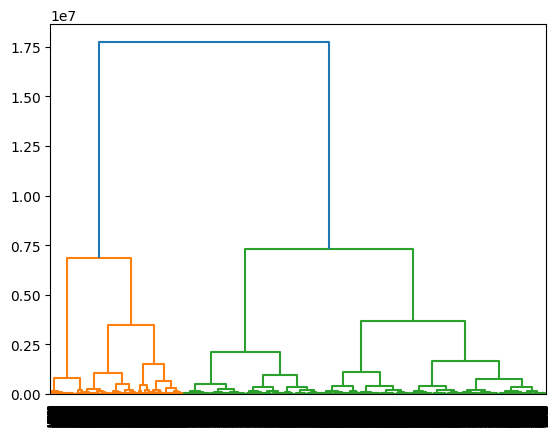

In [ ]:
scp.dendrogram(clusters)

plt.show()

Попробуем провести кластеризацию на 4 группы. При этом, ввиду разнородности исходных данных, кластеризацию будем проводить именно по числу конечных кластеров

In [ ]:
new_df = df.copy(deep = True)

new_df['clust'] = scp.fcluster(clusters, 4, criterion="maxclust")

In [ ]:
new_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,clust
0,-114.310,34.190,15.000,"5,612.000","1,283.000","1,015.000",472.000,1.494,"66,900.000",4
1,-114.470,34.400,19.000,"7,650.000","1,901.000","1,129.000",463.000,1.820,"80,100.000",4
2,-114.560,33.690,17.000,720.000,174.000,333.000,117.000,1.651,"85,700.000",4
3,-114.570,33.640,14.000,"1,501.000",337.000,515.000,226.000,3.192,"73,400.000",4
4,-114.570,33.570,20.000,"1,454.000",326.000,624.000,262.000,1.925,"65,500.000",4


In [ ]:
new_df.groupby("clust").mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
clust,,,,,,,,,
1,-119.719,35.255,33.510,"2,928.097",505.552,"1,136.424",471.507,7.266,"490,625.362"
2,-119.877,35.472,29.390,"3,106.193",584.411,"1,432.521",551.431,5.080,"324,653.788"
3,-119.377,35.192,28.347,"2,708.907",562.532,"1,511.393",529.142,3.954,"208,129.336"
4,-119.512,36.012,27.654,"2,357.082",510.412,"1,421.787",466.378,2.810,"112,911.144"


In [ ]:
new_df.groupby("clust").size()

clust
1    1144
2    3419
3    4711
4    7726
dtype: int64

Как можно увидеть, по итогам кластеризации было выделено 4 группы, наиболее ярко отличающихся по показателям **медианной стоимости квартиры** и  **медианного дохода домохозяйств**; соответственно, полученные кластеры можно назвать следующим образом: ***дома для наиболее богатых семей***, ***дома для богатых семей***, ***дома для семей со средним заработком*** и ***дома для семей с заработком ниже среднего***. При этом стоит отметить высокую, хотя и ожидаемую, неоднородность групп по числу представителей.

# Кластеризация методом k-средних

In [ ]:
clusters_2 = skl.KMeans(4)

In [ ]:
clusters_2.fit(df)

In [ ]:
clusters_2.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
clusters_2.cluster_centers_

array([[-1.19284505e+02,  3.51818736e+01,  2.80410605e+01,
         2.64627966e+03,  5.56281765e+02,  1.53636162e+03,
         5.21024087e+02,  3.76258159e+00,  1.90931830e+05],
       [-1.19810907e+02,  3.53502759e+01,  3.28369099e+01,
         2.96660822e+03,  5.17937462e+02,  1.18312446e+03,
         4.85218884e+02,  6.84015990e+00,  4.66678672e+05],
       [-1.19618557e+02,  3.62507601e+01,  2.77405405e+01,
         2.31163125e+03,  5.01387838e+02,  1.37114139e+03,
         4.55727703e+02,  2.63974024e+00,  9.93845264e+04],
       [-1.19861612e+02,  3.54682654e+01,  2.90456635e+01,
         3.07968557e+03,  5.87144652e+02,  1.45632577e+03,
         5.54219430e+02,  4.89179743e+00,  3.04474992e+05]])

In [ ]:
new_df1 = df.copy(deep = True)

new_df1['clust'] = clusters_2.labels_

In [ ]:
new_df1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,clust
0,-114.310,34.190,15.000,"5,612.000","1,283.000","1,015.000",472.000,1.494,"66,900.000",2
1,-114.470,34.400,19.000,"7,650.000","1,901.000","1,129.000",463.000,1.820,"80,100.000",2
2,-114.560,33.690,17.000,720.000,174.000,333.000,117.000,1.651,"85,700.000",2
3,-114.570,33.640,14.000,"1,501.000",337.000,515.000,226.000,3.192,"73,400.000",2
4,-114.570,33.570,20.000,"1,454.000",326.000,624.000,262.000,1.925,"65,500.000",2


In [ ]:
new_df1.groupby("clust").mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
clust,,,,,,,,,
0,-119.285,35.182,28.051,"2,646.790",556.276,"1,536.379",521.037,3.764,"191,012.466"
1,-119.812,35.351,32.844,"2,961.270",517.194,"1,181.363",484.491,6.840,"466,728.475"
2,-119.619,36.251,27.738,"2,311.407",501.331,"1,370.977",455.678,2.640,"99,392.247"
3,-119.861,35.466,29.032,"3,082.929",587.703,"1,457.243",554.729,4.894,"304,639.558"


In [ ]:
new_df1.groupby("clust").size()

clust
0    6193
1    1630
2    5921
3    3256
dtype: int64

Метод k-средних в целом выдал похожую кластеризацию по ***доходам семей*** и ***стоимости квартир***; несколько изменились численности кластеров, в результате чего наибольшее кол-во представителей принадлежит уже к группе среднего достатка, а не к бедным, как в предыдущем случае.